# MLP OPPE 2 Examination

## Que 1

In [1]:
import pandas as pd
import numpy as np
np.random.seed(32)
data = pd.read_csv('v4.csv')

In [2]:
data.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Evaluation
0,low,med,3,6,med,med,good
1,low,med,2,4,small,med,acc
2,high,med,3,4,med,high,acc
3,med,low,4,4,big,high,vgood
4,vhigh,med,3,6,big,high,acc


In [3]:
data['Doors'].dtype, data['Persons'].dtype

(dtype('int64'), dtype('int64'))

## Que 2

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1496 non-null   object
 1   Maint       1500 non-null   object
 2   Doors       1500 non-null   int64 
 3   Persons     1500 non-null   int64 
 4   Lug_boot    1500 non-null   object
 5   Safety      1500 non-null   object
 6   Evaluation  1500 non-null   object
dtypes: int64(2), object(5)
memory usage: 82.2+ KB


Column Buying has 4 null values

## Que 3

In [5]:
data['Lug_boot'].unique()

array(['med', 'small', 'big'], dtype=object)

## Que 4

In [6]:
y = data.pop('Evaluation')
X = data
X.shape, y.shape

((1500, 6), (1500,))

In [7]:
y.value_counts()

unacc    1039
acc       344
good       59
vgood      58
Name: Evaluation, dtype: int64

## Que 5

In [8]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='most_frequent')
X_trans = si.fit_transform(X)
type(X_trans)

numpy.ndarray

## Que 6

In [9]:
X_trans = pd.DataFrame(X_trans, columns=['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety'])

In [10]:
X_trans

,Buying,Maint,Doors,Persons,Lug_boot,Safety
0,low,med,3,6,med,med
1,low,med,2,4,small,med
2,high,med,3,4,med,high
3,med,low,4,4,big,high
4,vhigh,med,3,6,big,high
...,...,...,...,...,...,...
1495,high,med,4,6,big,low
1496,med,vhigh,2,6,med,high
1497,high,high,5,6,small,high
1498,high,med,3,6,big,high


In [11]:
X_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Buying    1500 non-null   object
 1   Maint     1500 non-null   object
 2   Doors     1500 non-null   object
 3   Persons   1500 non-null   object
 4   Lug_boot  1500 non-null   object
 5   Safety    1500 non-null   object
dtypes: object(6)
memory usage: 70.4+ KB


No more NAs in Buying column

## Que 7

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X1 = ohe.fit_transform(X_trans[['Buying', 'Maint', 'Lug_boot', 'Safety']])
X2 = ss.fit_transform(X_trans[['Doors', 'Persons']])

In [13]:
X1.shape, X2.shape

((1500, 14), (1500, 2))

In [14]:
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

## Que 8

In [15]:
X = pd.DataFrame(np.hstack((X1, X2)))
# X = np.concatenate((X1, X2), axis=1).shape

In [16]:
X.shape

(1500, 16)

## Que 9

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 16), (300, 16), (1200,), (300,))

## Que 10

In [18]:
from sklearn.linear_model import Perceptron
p = Perceptron(eta0=1, max_iter=10, shuffle=False, validation_fraction=0.2, penalty=None, alpha=0, fit_intercept=True, warm_start=False)
p.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


Perceptron(alpha=0, eta0=1, max_iter=10, shuffle=False, validation_fraction=0.2)

In [19]:
p.coef_[0][1]

-1.0

## Que 11

In [20]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', alpha=0.001, learning_rate='constant', eta0=0.01, max_iter=10, random_state=32)
sgd.fit(X_train, y_train)
sgd.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


0.7966666666666666

## Que 12

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

distributions = {'penalty': ['l1', 'l2'], 'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]}
lr = LogisticRegression(solver='saga', random_state=32, tol=0.01, max_iter=200)
rsc = RandomizedSearchCV(lr, param_distributions=distributions, random_state=32)
rsc.fit(X_train, y_train)

RandomizedSearchCV(estimator=LogisticRegression(max_iter=200, random_state=32,
                                                solver='saga', tol=0.01),
                   param_distributions={'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                                        'penalty': ['l1', 'l2']},
                   random_state=32)

In [22]:
rsc.best_params_

{'C': 3.5, 'penalty': 'l2'}

## Que 13

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'kernel': ['linear', 'rbf'], 'C': [1,10]}
svc = SVC()
gsc = GridSearchCV(svc, param_grid=param_grid)
gsc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [24]:
gsc.best_params_

{'C': 10, 'kernel': 'rbf'}

## Que 14

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1,3,5,7]}
knc = KNeighborsClassifier(metric='minkowski', p=2)
gsc = GridSearchCV(knc, scoring='accuracy', param_grid=param_grid, cv=4)
gsc.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7]}, scoring='accuracy')

In [26]:
gsc.best_params_

{'n_neighbors': 7}

## Que 15

In [27]:
gsc.best_score_

0.9116666666666666

## Que 16

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=5, min_impurity_decrease=0.001, random_state=32)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.001, min_samples_split=5,
                       random_state=32)

In [29]:
dtc.score(X_test, y_test)

0.9566666666666667

## Que 17

In [30]:
dtc.get_depth()

11

## Que 18

In [31]:
dtc.n_features_, dtc.n_classes_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


(16, 4)

[Text(0.7359913793103449, 0.9583333333333334, 'X[12] <= 0.5\ngini = 0.462\nsamples = 1200\nvalue = [283, 43, 831, 43]'),
 Text(0.71875, 0.875, 'X[15] <= -0.617\ngini = 0.579\nsamples = 800\nvalue = [283, 43, 431, 43]'),
 Text(0.7015086206896551, 0.7916666666666666, 'gini = 0.0\nsamples = 263\nvalue = [0, 0, 263, 0]'),
 Text(0.7359913793103449, 0.7916666666666666, 'X[7] <= 0.5\ngini = 0.612\nsamples = 537\nvalue = [283, 43, 168, 43]'),
 Text(0.5581896551724138, 0.7083333333333334, 'X[1] <= 0.5\ngini = 0.603\nsamples = 401\nvalue = [230, 43, 85, 43]'),
 Text(0.34913793103448276, 0.625, 'X[10] <= 0.5\ngini = 0.53\nsamples = 306\nvalue = [192, 16, 81, 17]'),
 Text(0.1853448275862069, 0.5416666666666666, 'X[2] <= 0.5\ngini = 0.461\nsamples = 204\nvalue = [145, 10, 32, 17]'),
 Text(0.10344827586206896, 0.4583333333333333, 'X[4] <= 0.5\ngini = 0.339\nsamples = 134\nvalue = [105, 0, 29, 0]'),
 Text(0.06896551724137931, 0.375, 'X[14] <= -0.892\ngini = 0.123\nsamples = 91\nvalue = [85, 0, 6, 0]'

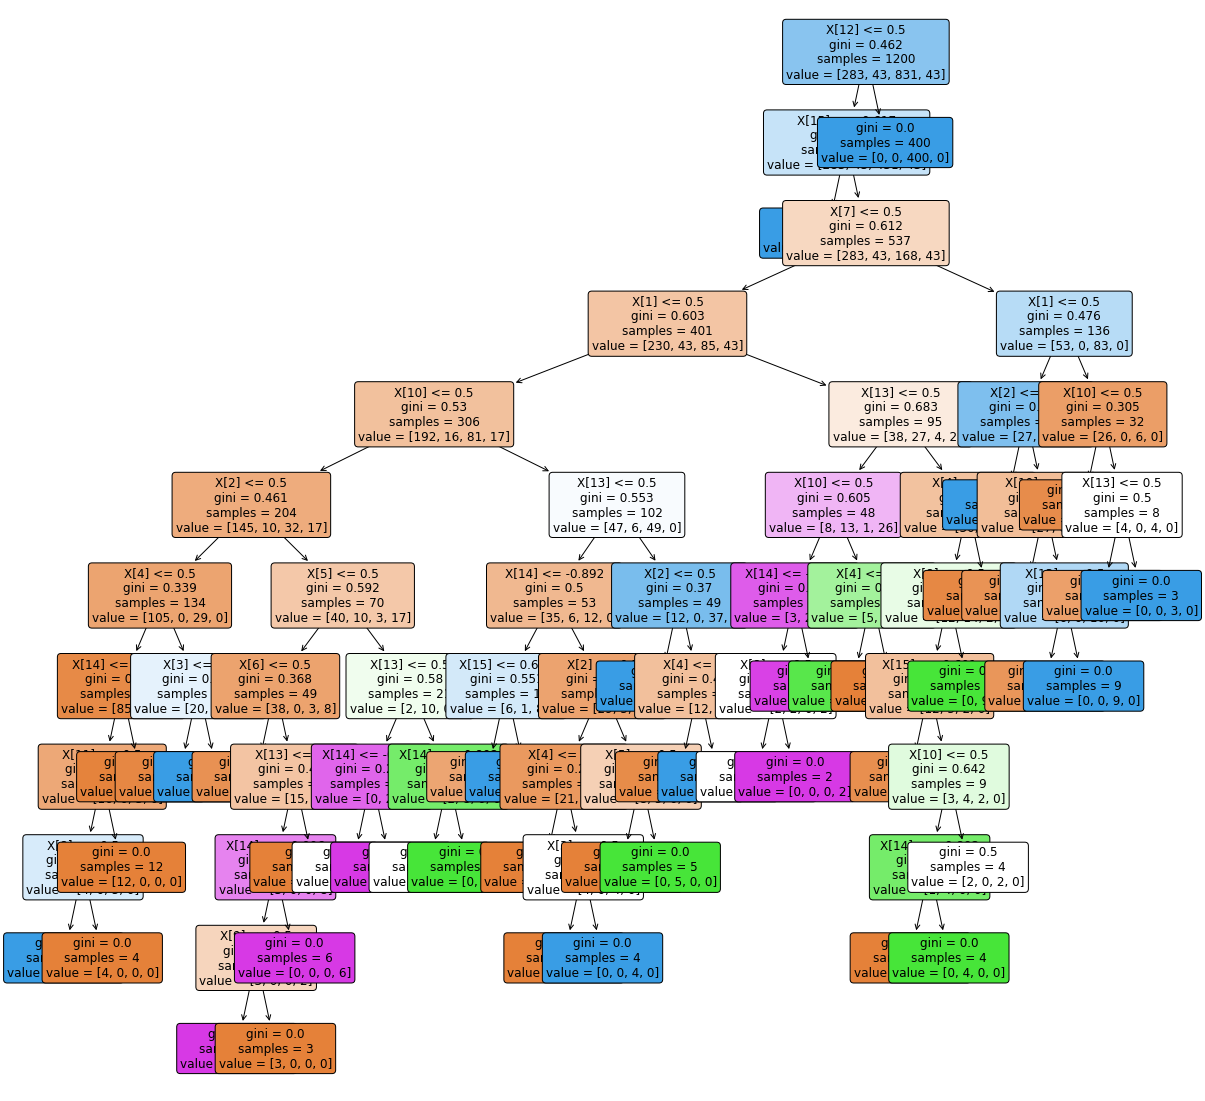

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

from sklearn.tree import plot_tree
plot_tree(dtc, filled=True, rounded=True, fontsize=12)

## Que 19

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [10, 11, 12, 13, 14, 15]}
rfc = RandomForestClassifier(random_state=32)
gsc = GridSearchCV(rfc, param_grid=param_grid, return_train_score=True)
gsc.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=32),
             param_grid={'max_depth': [10, 11, 12, 13, 14, 15]},
             return_train_score=True)

In [34]:
gsc.cv_results_['mean_train_score']

array([0.99916667, 1.        , 1.        , 1.        , 1.        ,
       1.        ])

All, but one training scores are a perfect 1.  So, I guess the question should've been "...produce the best score on the testing data"

In [35]:
best_index = gsc.cv_results_['mean_test_score'].argmax()

In [36]:
gsc.cv_results_['params'][best_index]

{'max_depth': 11}

## Que 20

In [37]:
# support vector classifier (SVC), LogisticRegression, KNeighborsClassifier and DecisionTreeClassifier.
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

B1 = BaggingClassifier(base_estimator=SVC(random_state=32), n_estimators=15, random_state=32)
B1.fit(X_train, y_train)
b1_score = B1.score(X_test, y_test)

B2 = BaggingClassifier(base_estimator=LogisticRegression(random_state=32), n_estimators=15, random_state=32)
B2.fit(X_train, y_train)
b2_score = B2.score(X_test, y_test)

B3 = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=15, random_state=32)
B3.fit(X_train, y_train)
b3_score = B3.score(X_test, y_test)

B4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=32), n_estimators=15, random_state=32)
B4.fit(X_train, y_train)
b4_score = B4.score(X_test, y_test)

print(b1_score, b2_score, b3_score, b4_score)

0.9533333333333334 0.81 0.9266666666666666 0.97


DecisionTreeClassifier has the best score of 0.97